<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#資料描述" data-toc-modified-id="資料描述-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>資料描述</a></span></li><li><span><a href="#資料前處理" data-toc-modified-id="資料前處理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>資料前處理</a></span><ul class="toc-item"><li><span><a href="#極端值處理" data-toc-modified-id="極端值處理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>極端值處理</a></span><ul class="toc-item"><li><span><a href="#剔除->平均數+3個標準差-及-<平均數-3個標準差的資料" data-toc-modified-id="剔除->平均數+3個標準差-及-<平均數-3個標準差的資料-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>剔除 &gt;平均數+3個標準差 及 &lt;平均數-3個標準差的資料</a></span></li></ul></li><li><span><a href="#缺失值處理" data-toc-modified-id="缺失值處理-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>缺失值處理</a></span><ul class="toc-item"><li><span><a href="#數值型資料-->-補中位數" data-toc-modified-id="數值型資料-->-補中位數-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>數值型資料 -&gt; 補中位數</a></span></li><li><span><a href="#類別型資料-->-自成一類" data-toc-modified-id="類別型資料-->-自成一類-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>類別型資料 -&gt; 自成一類</a></span></li></ul></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#X變數-描述統計量-&amp;-直方圖" data-toc-modified-id="X變數-描述統計量-&amp;-直方圖-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>X變數 描述統計量 &amp; 直方圖</a></span></li><li><span><a href="#X變數-盒形圖" data-toc-modified-id="X變數-盒形圖-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>X變數 盒形圖</a></span></li><li><span><a href="#X與Y-盒形圖" data-toc-modified-id="X與Y-盒形圖-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>X與Y 盒形圖</a></span></li><li><span><a href="#X與Y-直方圖" data-toc-modified-id="X與Y-直方圖-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>X與Y 直方圖</a></span></li><li><span><a href="#X與Y-散佈圖" data-toc-modified-id="X與Y-散佈圖-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>X與Y 散佈圖</a></span></li><li><span><a href="#相關分析" data-toc-modified-id="相關分析-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>相關分析</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#UNDER-&amp;-OVER-Sampling-(最後沒採用)" data-toc-modified-id="UNDER-&amp;-OVER-Sampling-(最後沒採用)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>UNDER &amp; OVER Sampling (最後沒採用)</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#kNN" data-toc-modified-id="kNN-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>kNN</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#優化空間" data-toc-modified-id="優化空間-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>優化空間</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Functions</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#設定預設繪圖大小(長,寬)
# plt.rcParams["figure.figsize"] = (20,10)

In [56]:
data_path = 'data/'
df = pd.read_csv(data_path + 'train.csv')

## 資料描述
- acidity 酸度
- citric_acid 檸檬酸
- sugar 糖
- total_sulfur_dioxide 二氧化硫(總)
- alcohol 酒精
- pH pH值
- free_sulfur_dioxide 二氧化硫(游離)
- quality 品質

In [57]:
df.head()

,acidity,citric_acid,sugar,total_sulfur_dioxide,alcohol,pH,free_sulfur_dioxide,quality
0,83.721721,0.262484,21.137710,8558.587840,Low,3.61,168.77,0
1,82.005119,0.316941,21.281502,9424.589150,High,3.41,155.19,0
2,84.751683,0.320831,20.850128,9291.358179,Low,3.31,157.03,0
3,83.893382,0.353895,21.137710,10223.974974,Low,3.36,143.17,0
4,84.408362,0.281933,20.850128,11423.053711,Low,3.08,123.83,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidity               1175 non-null   float64
 1   citric_acid           1175 non-null   float64
 2   sugar                 1177 non-null   float64
 3   total_sulfur_dioxide  1200 non-null   float64
 4   alcohol               1173 non-null   object 
 5   pH                    1200 non-null   float64
 6   free_sulfur_dioxide   1200 non-null   float64
 7   quality               1200 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 75.1+ KB


In [6]:
df.isnull().sum()

acidity                 25
citric_acid             25
sugar                   23
total_sulfur_dioxide     0
alcohol                 27
pH                       0
free_sulfur_dioxide      0
quality                  0
dtype: int64

In [7]:
df.describe()

,acidity,citric_acid,sugar,total_sulfur_dioxide,pH,free_sulfur_dioxide,quality
count,1175.000000,1175.000000,1177.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,85.382662,0.314076,21.892523,9344.359125,17.418375,156.390042,0.134167
std,2.961525,0.037978,2.049290,1093.218952,117.717194,17.040968,0.340973
min,79.258555,0.262484,19.556006,7992.356215,2.740000,22.750000,0.000000
25%,83.378401,0.279988,20.993919,8525.280098,3.210000,148.622500,0.000000
50%,84.751683,0.311107,21.425293,9058.203980,3.310000,161.010000,0.000000
75%,86.811606,0.344170,22.000458,9857.589805,3.402500,168.995000,0.000000
max,98.484504,0.456975,40.549539,17418.447393,999.000000,176.990000,1.000000


In [8]:
df.quality.value_counts()

0    1039
1     161
Name: quality, dtype: int64

## 資料前處理

### 極端值處理

#### 剔除 >平均數+3個標準差 及 <平均數-3個標準差的資料

In [59]:
n_std = 3
for x in list(df.columns):
    if x != 'quality' and df[x].dtype != 'object':
        df = df.loc[~(df[x] > df[x].mean()+df[x].std()*n_std) & ~(df[x] < df[x].mean()-df[x].std()*n_std), :]#.acidity.describe()
        print(f"{x}:{len(df)}")

acidity:1190
citric_acid:1189
sugar:1167
total_sulfur_dioxide:1148
pH:1131
free_sulfur_dioxide:1119


In [60]:
# n_std = 3
# for x in list(df.columns):
#     if x != 'quality' and df[x].dtype != 'object':
#         head = df.loc[(df[x] > df[x].mean()+df[x].std()*n_std), :]#.acidity.describe()
#         tail = df.loc[(df[x] < df[x].mean()-df[x].std()*n_std), :]#.acidity.describe()

#         print(x, "drop", f"head:{len(head)}", f"tail:{len(tail)}")

### 缺失值處理

#### 數值型資料 -> 補中位數

In [61]:
df = df.fillna(df.median())

In [62]:
# for x in list(df.columns):
#     if x != 'quality' and df[x].dtype != 'object':
#         q_50 = np.percentile(df[~df[x].isnull()][x], q = 50)
#         df.loc[df[x].isnull(),x] = q_50

#### 類別型資料 -> 自成一類

In [63]:
df.loc[df.alcohol == 'lowW', "alcohol"] = 'Low'
df.loc[df.alcohol.isnull(), "alcohol"] = 'unknown'
df.alcohol.value_counts()

Low        600
Medium     367
High       110
unknown     42
Name: alcohol, dtype: int64

## EDA

### X變數 描述統計量 & 直方圖

acidity 
-----------------
count    944.000000
mean      84.936800
std        2.396252
min       79.601875
25%       83.206741
50%       84.408362
75%       86.296625
max       91.274773
Name: acidity, dtype: float64


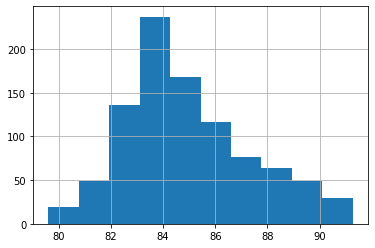

citric_acid 
-----------------
count    944.000000
mean       0.307907
std        0.034162
min        0.262484
25%        0.276098
50%        0.305272
75%        0.338335
max        0.381123
Name: citric_acid, dtype: float64


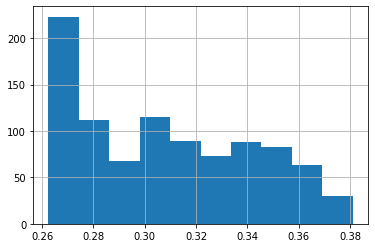

sugar 
-----------------
count    944.000000
mean      21.460327
std        0.842125
min       19.987380
25%       20.993919
50%       21.281502
75%       21.856667
max       25.595241
Name: sugar, dtype: float64


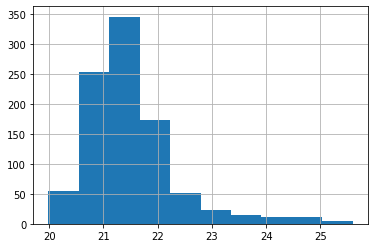

total_sulfur_dioxide 
-----------------
count      944.000000
mean      9059.527116
std        705.066087
min       7992.356215
25%       8458.664612
50%       8924.973010
75%       9524.512378
max      10790.206600
Name: total_sulfur_dioxide, dtype: float64


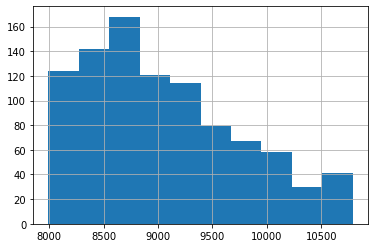

alcohol 
-----------------
count     944
unique      4
top       Low
freq      500
Name: alcohol, dtype: object


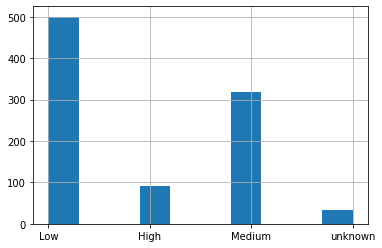

pH 
-----------------
count    944.000000
mean       3.335773
std        0.145643
min        2.890000
25%        3.230000
50%        3.340000
75%        3.420000
max        4.010000
Name: pH, dtype: float64


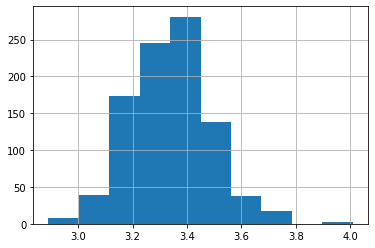

free_sulfur_dioxide 
-----------------
count    944.000000
mean     160.848242
std       10.860224
min      134.110000
25%      153.550000
50%      162.995000
75%      169.852500
max      176.990000
Name: free_sulfur_dioxide, dtype: float64


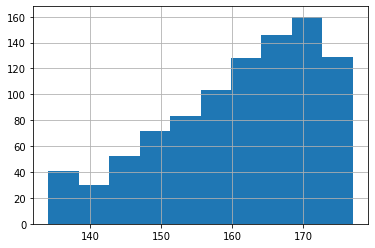

quality 
-----------------
count    944.000000
mean       0.128178
std        0.334465
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: quality, dtype: float64


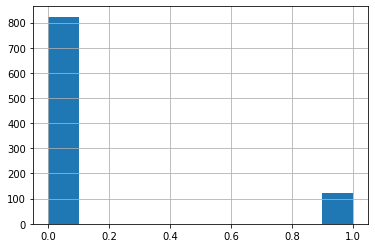

In [16]:
for x in list(df.columns):
    print(x,'\n-----------------')
    print(df[x].describe())
    df[x].hist()
    plt.show()

### X變數 盒形圖

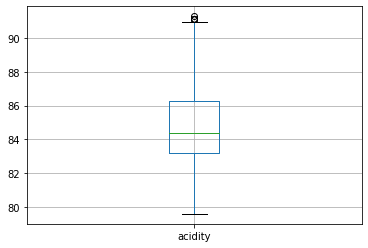

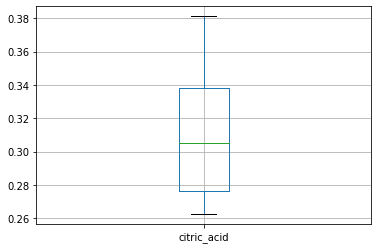

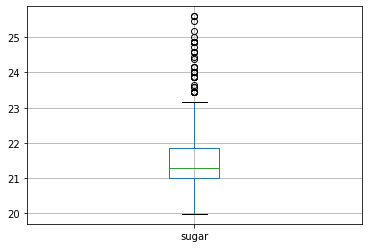

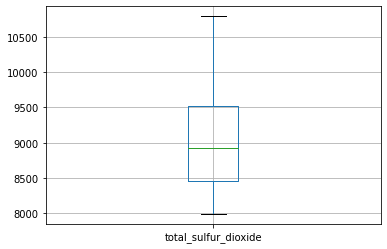

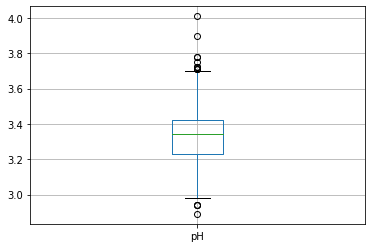

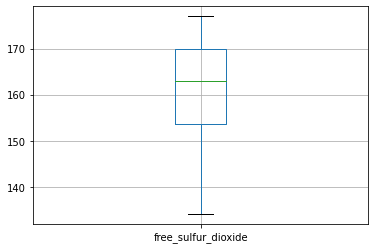

In [17]:
for x in list(df.columns):
    if x != 'quality' and df[x].dtype != 'object':
        df.boxplot(x)
        plt.show()

### X與Y 盒形圖

acidity


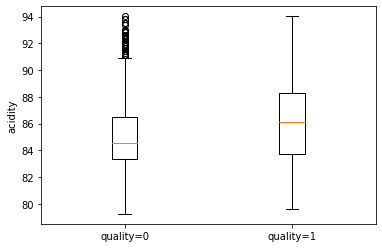

citric_acid


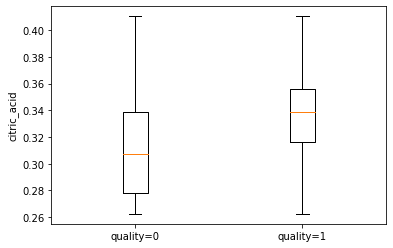

sugar


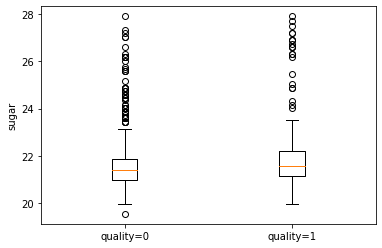

total_sulfur_dioxide


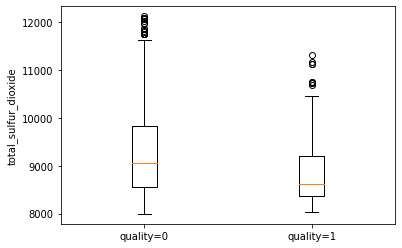

pH


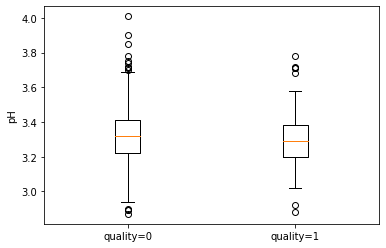

free_sulfur_dioxide


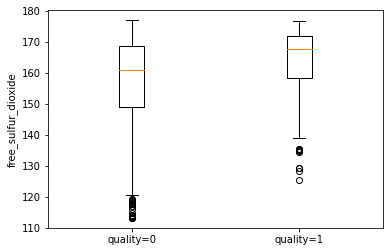

In [20]:
for x in df.columns:
    if x != 'quality' and df[x].dtype != 'object':
        print(x)
        plt.boxplot([df[df['quality']==0][x], df[df['quality']==1][x]], 
                    labels = ['quality=0', 'quality=1'])
        plt.ylabel(x)
        plt.show()

### X與Y 直方圖

acidity


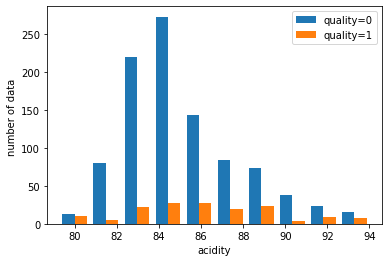

citric_acid


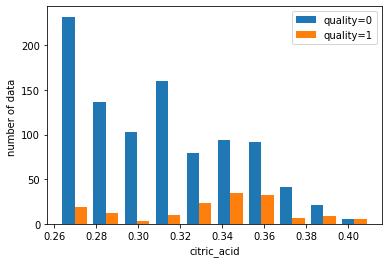

sugar


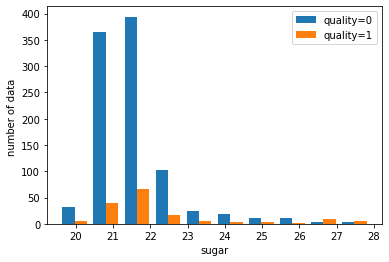

total_sulfur_dioxide


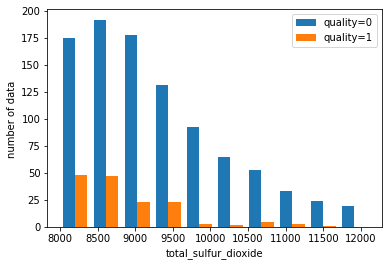

pH


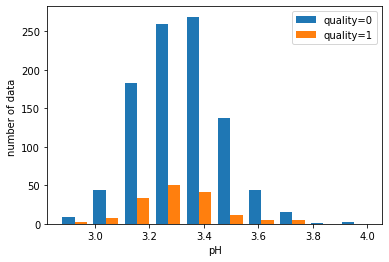

free_sulfur_dioxide


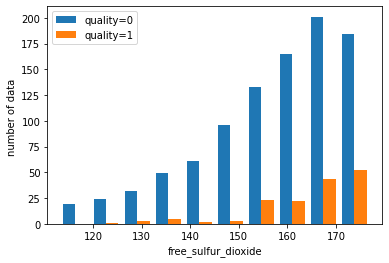

In [21]:
for x in df.columns:
    if x != 'quality' and df[x].dtype != 'object':
        print(x)
        df0 = df[df['quality']==0]
        df1 = df[df['quality']==1]
        plt.hist([df0[x], df1[x]], label = ['quality=0', 'quality=1'], stacked=False)#True
        plt.xlabel(x)
        plt.ylabel('number of data ')
        plt.legend()
        plt.show()

### X與Y 散佈圖

acidity


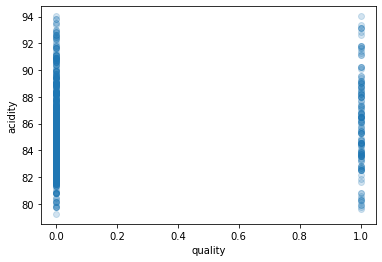

citric_acid


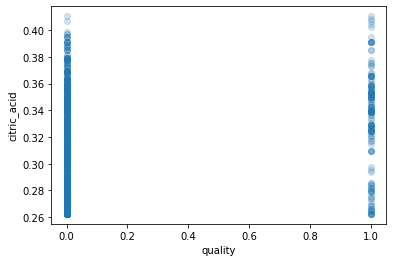

sugar


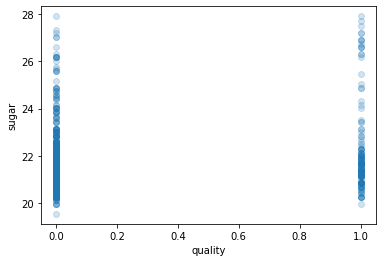

total_sulfur_dioxide


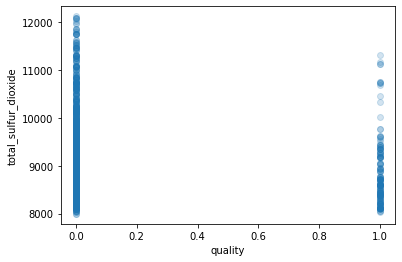

alcohol


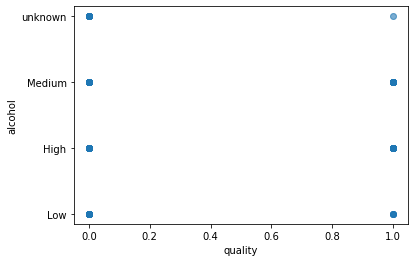

pH


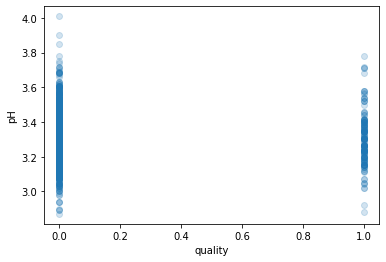

free_sulfur_dioxide


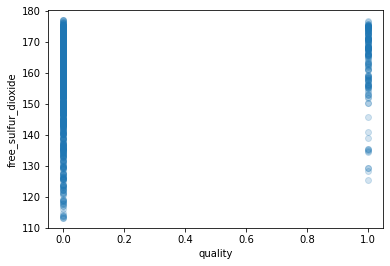

In [22]:
for x in df.columns:
    if x != 'quality':# and df[x].dtype != 'object':
        print(x)
        plt.scatter("quality", x, data=df, alpha = 0.2)
        plt.xlabel('quality')
        plt.ylabel(x)
        plt.show()

### 相關分析

<AxesSubplot:>

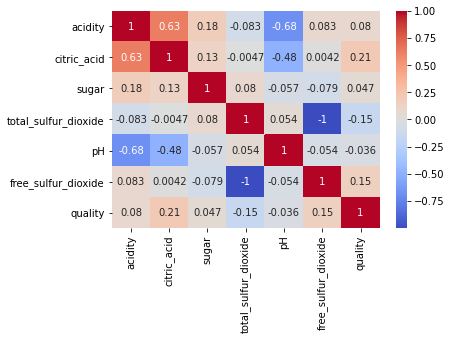

In [19]:
import seaborn as sns
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [64]:
x = df.drop('quality', axis = 1).copy()
y = df['quality'].copy()

In [65]:
x = pd.get_dummies(x, columns = ['alcohol'])

In [66]:
#預測 y之最佳features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression,f_classif #卡方、相關、ANOVA

test_chi2, test_f_regression, test_f_classif = chi2, f_regression, f_classif

for test in [test_chi2,test_f_regression,test_f_classif]:
    #apply SelectKBest class to extract top XXX best features
    bestfeatures = SelectKBest(score_func=test, k='all')
    fit = bestfeatures.fit(x,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfpvalues = pd.DataFrame(fit.pvalues_).apply(lambda x: round(x, 3))
    dfcolumns = pd.DataFrame(x.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
    featureScores.columns = ['Factor','Score','p-value']  #naming the dataframe columns
    print(f'{test}')
    print(featureScores.nlargest(len(x.columns),'Score'),'\n')  #print XXX best features

<function chi2 at 0x7ff2676c1840>
                 Factor        Score  p-value
3  total_sulfur_dioxide  2766.585783    0.000
6          alcohol_High   114.471555    0.000
7           alcohol_Low    62.903329    0.000
5   free_sulfur_dioxide    38.587890    0.000
8        alcohol_Medium    20.776658    0.000
2                 sugar     2.089333    0.148
0               acidity     1.345194    0.246
9       alcohol_unknown     0.659240    0.417
1           citric_acid     0.235943    0.627
4                    pH     0.018348    0.892 

<function f_regression at 0x7ff2676c1730>
                 Factor       Score  p-value
7           alcohol_Low  154.052907    0.000
6          alcohol_High  142.940929    0.000
1           citric_acid   56.667161    0.000
2                 sugar   32.146004    0.000
8        alcohol_Medium   31.737946    0.000
3  total_sulfur_dioxide   30.732266    0.000
5   free_sulfur_dioxide   30.618076    0.000
0               acidity   14.867227    0.000
4          

## Modeling

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

### UNDER & OVER Sampling (最後沒採用)
- 為了讓樣本平衡，使用過採樣可以把少數類別的樣本增多；使用欠採樣可以把多數類別的樣本減少
- 參考套件：https://github.com/scikit-learn-contrib/imbalanced-learn

In [108]:
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=666) #ratio預設為1，會讓標籤平衡(1:1)
x_train, y_train = smote_enn.fit_resample(x_train, y_train)
print(sorted(Counter(y_train).items()))

[(0, 541), (1, 558)]


In [68]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=7)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train)
print(sorted(Counter(y_train).items()))

[(0, 751), (1, 751)]


In [111]:
#訓練集、測試集數量
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1502, 10), (224, 10), (1502,), (224,))

In [112]:
print(y_train.value_counts())
print(y_test.value_counts())

1    751
0    751
Name: quality, dtype: int64
0    189
1     35
Name: quality, dtype: int64


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight={0:.2, 1:.8},random_state=666) #balanced #class_weight={0:.1, 1:.9},
model.fit(x_train,y_train)

/home/g60771008h/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=666)

### Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB#GaussianNB#MultinomialNB##
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

### kNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,
                               #class_weight={0:.1, 1:.9},#,,{1:.1, 2:.35, 3:.35, 4:.2},#{0:.1, 1:.9},#
                               random_state=666,
                               bootstrap=True)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=666)

### XGBoost

In [69]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, 
#                       class_weight={0:.2, 1:.8},  #balanced #class_weight={0:.1, 1:.9},
                      random_state=666)
model.fit(x_train,y_train)

XGBClassifier(n_estimators=500, random_state=666)

### 優化空間
- 模型調參 random search
- 集成模型(都要是好模型)
- 過採樣/欠採樣
- 極端值不剔除，賦予最大值
- 特徵組合(數值-數值)(類別-數值) 挑importance前幾名
- 偏態嚴重 log1p
- K-fold交叉驗證 cross_val_score(model,  x,  y,  cv = 5, scoring = 'accuracy') 

## Evaluation

In [70]:
y_pred = model.predict(x_test)
y_score = model.predict_proba(x_test)

In [71]:
# from sklearn.metrics import classification_report
# target_names = ['quality = 0', 'quality = 1']
# print(classification_report(y_test, y_pred, target_names=target_names))

In [72]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("accuracy:",accuracy)
print("precision:",precision.mean(),precision)
print("recall:",recall.mean(),recall)
print("f1:",f1.mean(),f1)

accuracy: 0.84375
precision: 0.706989247311828 [0.91397849 0.5       ]
recall: 0.7211640211640211 [0.8994709  0.54285714]
f1: 0.713607305936073 [0.90666667 0.52054795]


Confusion matrix, without normalization
[[170  19]
 [ 16  19]]


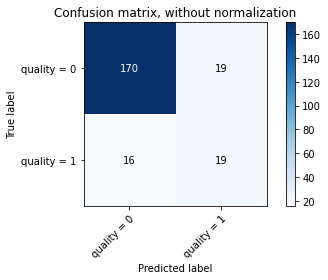

In [73]:
#from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

# Plot non-normalized confusion matrix
class_names=['quality = 0','quality = 1']
plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization') #y_test.y2=實際結果, ff.b=預測結果
plt.show()

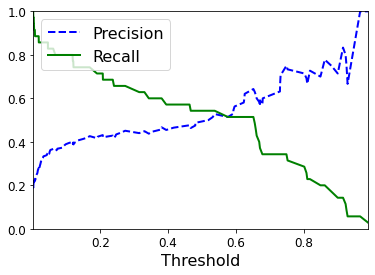

In [123]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score[:,1])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([thresholds.min(), thresholds.max()])
plt.show()

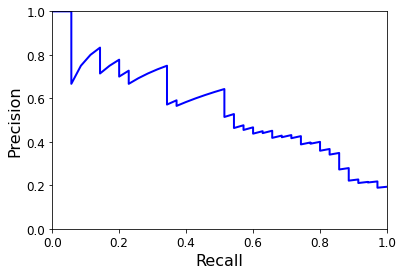

In [124]:
plot_precision_vs_recall(precisions, recalls)
plt.show()

No handles with labels found to put in legend.


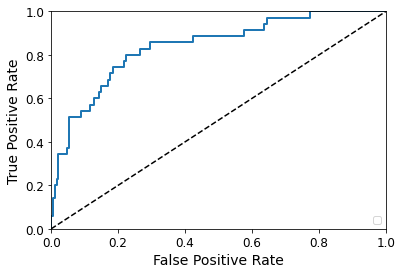

auc: 0.7211640211640211


In [125]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_score[:,1])
plot_roc_curve(fpr_forest, tpr_forest)
plt.legend(loc="lower right")
plt.show()
print("auc: " + str(roc_auc_score(y_test, y_pred)))

In [74]:
model.feature_importances_

array([0.16632016, 0.15765765, 0.15072764, 0.10672211, 0.11850312,
       0.16632016, 0.02148302, 0.03672904, 0.03811504, 0.03742204],
      dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

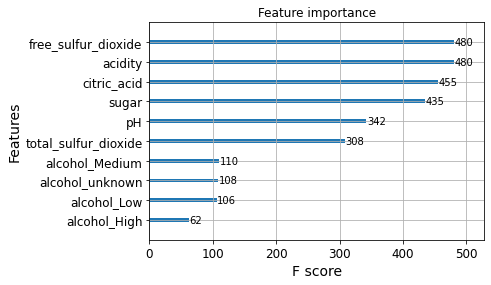

In [153]:
from xgboost import plot_importance
plot_importance(model)

In [155]:
# importances = list(zip(x.columns, model.feature_importances_))
# feature_importances = pd.DataFrame(list(zip(x.columns, model.feature_importances_)), columns=["feature", "importance"])
# feature_importances = feature_importances.sort_values("importance", ascending=False)
# feature_importances[:]

,feature,importance
0,acidity,0.166320
5,free_sulfur_dioxide,0.166320
1,citric_acid,0.157658
2,sugar,0.150728
4,pH,0.118503
3,total_sulfur_dioxide,0.106722
8,alcohol_Medium,0.038115
9,alcohol_unknown,0.037422
7,alcohol_Low,0.036729
6,alcohol_High,0.021483


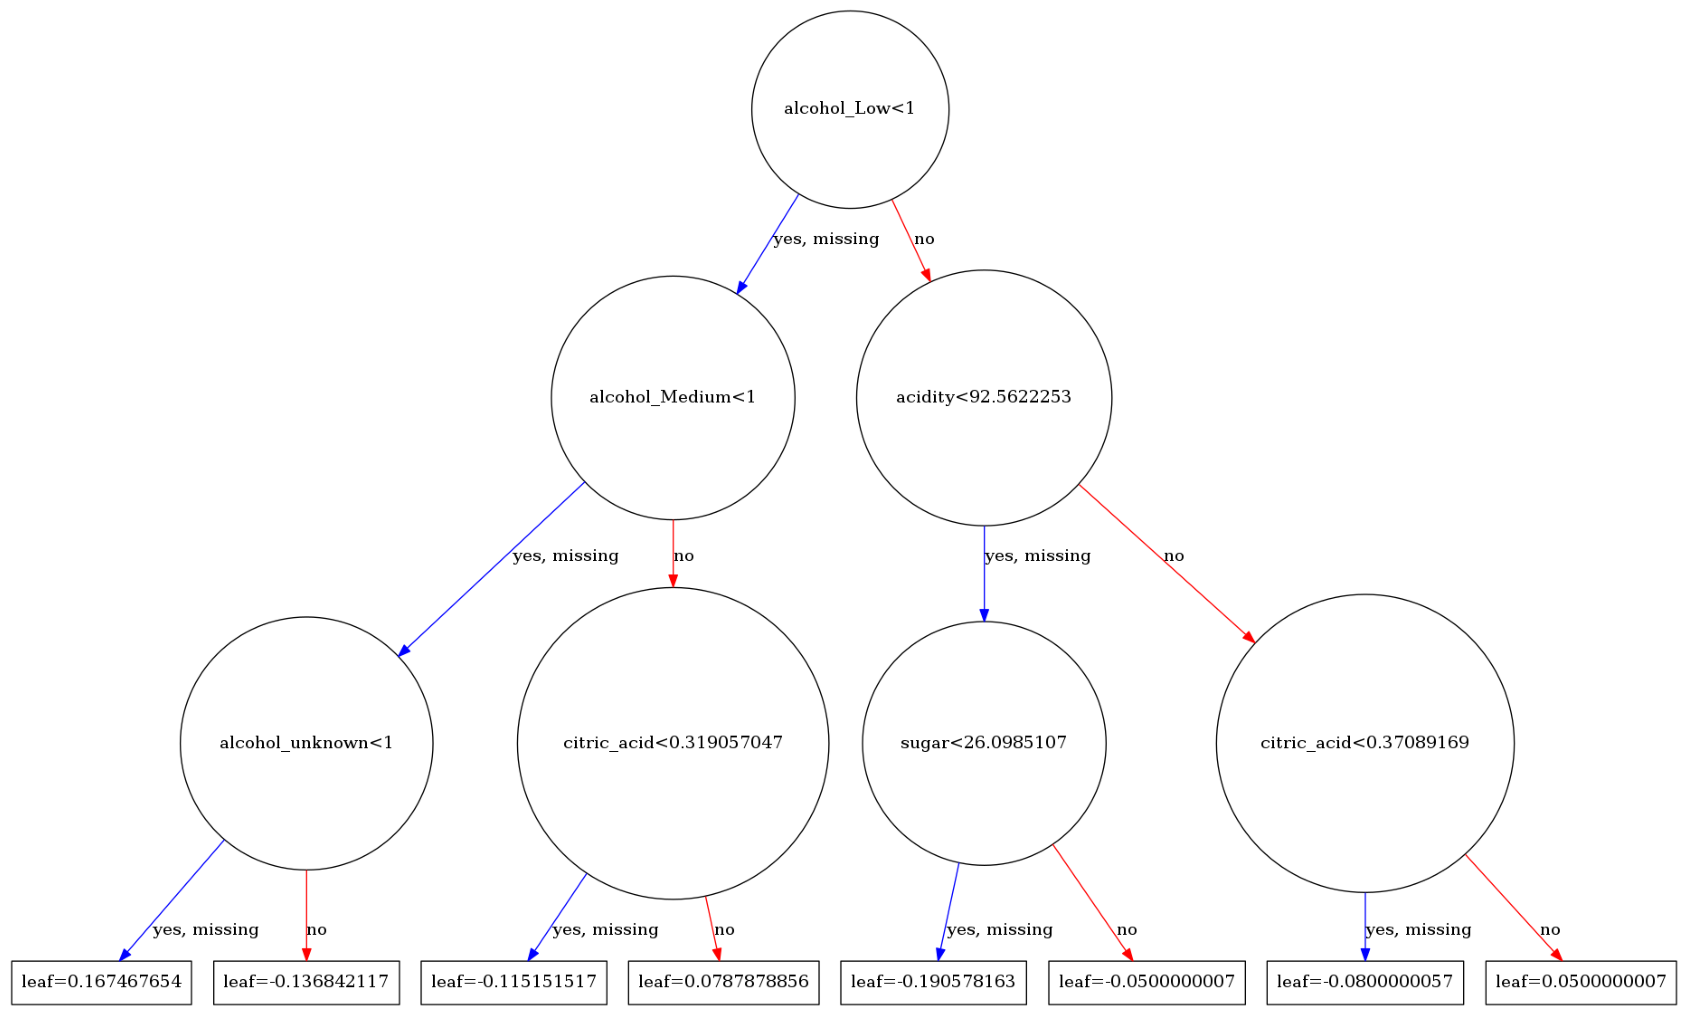

In [150]:
from xgboost import plot_tree
# plot single tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model, ax=ax)
plt.show()

## Functions

In [29]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes#[unique_labels(y_true, y_pred)]  #好像不需要???
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
#     ax.set_xticks(np.arange(cm.shape[1]))
#     ax.set_yticks(np.arange(cm.shape[0]))
#     ax.set_xticklabels(classes,color='white')
#     ax.set_yticklabels(classes,color='white')
#     ax.set_xlabel('Predicted label',color='white')
#     ax.set_ylabel('True label',color='white')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

In [32]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')